# Part 1

| Column Name          | English Description                                         | German Description                                          |
|----------------------|-------------------------------------------------------------|-------------------------------------------------------------|
| fixed acidity        | Fixed acidity of the wine in g(tartaric acid)/dm^3          | Fixe Säure des Weins in g(Weinsäure)/dm^3                    |
| volatile acidity     | Volatile acidity of the wine in g(acetic acid)/dm^3         | Flüchtige Säure des Weins in g(Essigsäure)/dm^3             |
| citric acid          | Citric acid content of the wine in g/dm^3                   | Zitronensäuregehalt des Weins in g/dm^3                     |
| residual sugar       | Sugar content remaining after fermentation in g/dm^3        | Zuckerinhalt, der nach der Fermentation in g/dm^3 verbleibt |
| chlorides            | Chloride content of the wine in g(sodium chloride)/dm^3     | Chloridgehalt des Weins in g(Natriumchlorid)/dm^3           |
| free sulfur dioxide  | Free form of SO2 in mg/dm^3                                 | Freie Form von SO2 in mg/dm^3                               |
| total sulfur dioxide | Total form of SO2 in mg/dm^3                                | Gesamtform von SO2 in mg/dm^3                               |
| density              | Density of the wine in g/cm^3                               | Dichte des Weins in g/cm^3                                  |
| pH                   | pH of the wine                                              | pH-Wert des Weins                                           |
| sulphates            | Sulphate content of the wine in g(potassium sulphate)/dm^3  | Sulfatgehalt des Weins in g(Kaliumsulfat)/dm^3              |
| alcohol              | Alcohol content of the wine in % vol                        | Alkoholgehalt des Weins in % vol                            |
| quality              | Quality score of the wine (0-10)                            | Qualitätspunktzahl des Weins (0-10)                         |


In [1]:
### 1. Import the necessary libraries (Importieren Sie die notwendigen Bibliotheken )

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2 .Print first 5 row of the dataset (winequality-red) (Geben Sie die ersten 5 Zeilen des Datensatzes aus.)

In [3]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
### 3  Use the 'check_df' function to analyze the dataset.(Verwende die Funktion 'check_df', um das Dataset zu analysieren)

In [5]:
def check_df(dataframe, head=3):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Duplicate Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### NA #####################")
    print(dataframe.isna().mean()*100)

    print("##################### Unique Values #####################")
    print(dataframe.nunique())

In [6]:
check_df(df)

##################### Shape #####################
(1599, 12)
##################### Duplicate Values #####################
240
##################### Types #####################
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
##################### Head #####################
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sul

In [7]:
### 4  First, examine the unique values of the dataset to decide which columns should be treated as numerical and which should be considered categorical.(You do not need write a code )
### Zuerst untersuchen Sie die einzigartigen Werte des Datensatzes, um zu entscheiden, welche Spalten als numerisch und welche als kategorisch behandelt werden sollten.(Es ist nicht notwendig, einen Code zu schreiben.)

# Part 2 

In [8]:
### 5 . ### 4. Use the 'find_categorical_columns' function to find the categorical columns.
### Verwende die Funktion 'find_categorical_columns', um die kategorischen Spalten zu finden

In [9]:
def find_categorical_columns(df, max_unique_values=10, include_mixed_types=True):
    categorical_cols = []
    for col in df.columns:
        dtype = str(df[col].dtypes)       
        if dtype in ["category", "object", "bool"]:
            categorical_cols.append(col)
        elif include_mixed_types and pd.api.types.is_object_dtype(df[col]):
            categorical_cols.append(col)
        else:
            num_unique_values = df[col].nunique(dropna=False)
            if num_unique_values <= max_unique_values:
                categorical_cols.append(col)

    return categorical_cols

categorical_columns = find_categorical_columns(df)

In [10]:
categorical_columns

['quality']

In [11]:
### 6 Select the numerical columns  (Die numerischen Spalten auswählen)

numerical_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

In [12]:
numerical_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [13]:
### 7. Use the code below to analyze the distribution of the numerical columns.
### . Verwenden Sie den untenstehenden Code, um die Verteilung der numerischen Spalten zu analysieren.


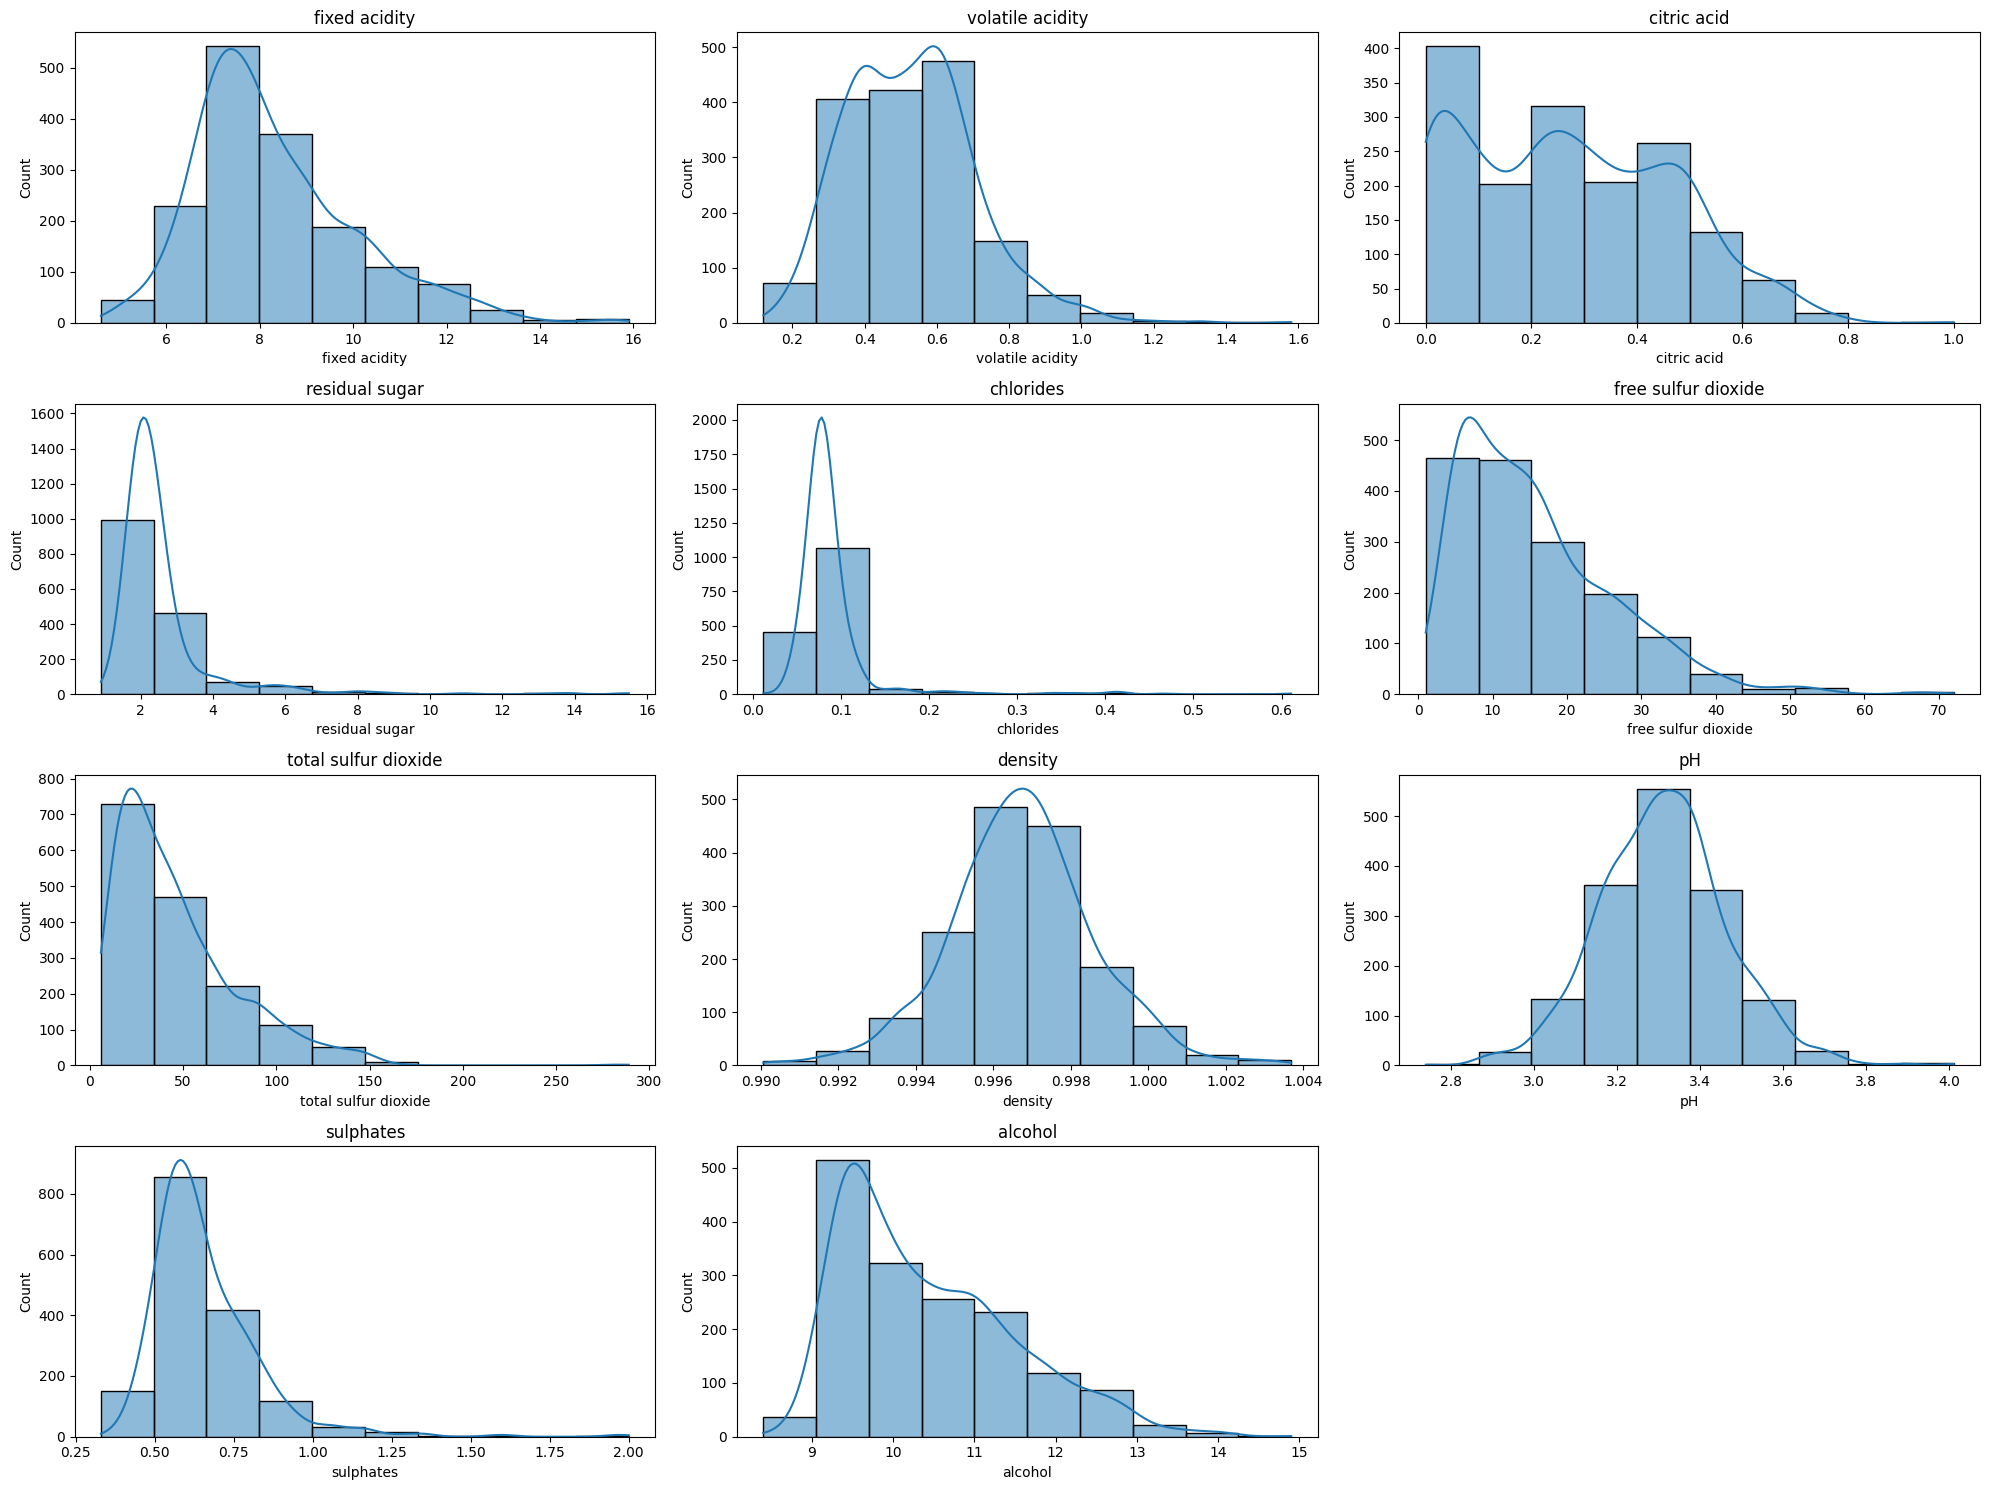

In [14]:
# Plotting distribution for all numerical 
plt.figure(figsize=(20, 15))
for i, column in enumerate(df[numerical_columns].columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(column)
plt.tight_layout()
plt.show()

In [15]:
### 8. Decide which correlation method is better to use for numerical columns (method: {'pearson', 'kendall', 'spearman'}).
### Entscheiden Sie, welche Korrelationsmethode für numerische Spalten besser zu verwenden ist (Methode: {'pearson', 'kendall', 'spearman'}).

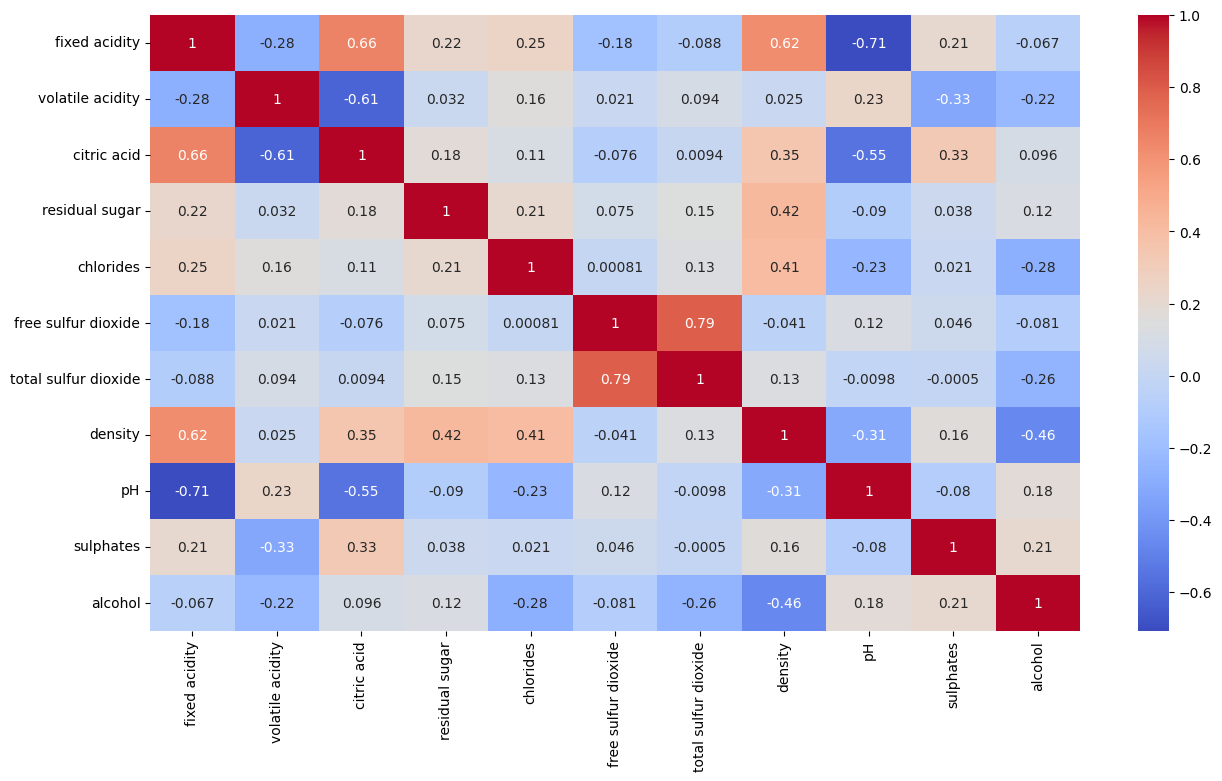

In [16]:
plt.figure(figsize=(15, 8))  
correlation_matrix = df[numerical_columns].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Part 3 

In [17]:
### 9 Create a new columns called qualiyt_category  for quality like #(If the sore is 2 , 3  and 4 , the write 'bad ', if the score is 5 and 6 the average , if the score 7 and 8  then high   )
###Erstellen Sie eine neue Spalte namens quality_category für die Qualität wie folgt: Wenn die Punktzahl 2, 3 oder 4 ist, dann schreiben Sie 'schlecht';
###wenn die Punktzahl 5 oder 6 ist, dann 'durchschnittlich'; wenn die Punktzahl 7 oder 8 ist, dann 'hoch'.

In [18]:
df['quality_category'] = pd.cut(df['quality'], bins=[2, 4, 6, 8], labels=['bad', 'average', 'high'], right=False)
